In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss
import pandas as pd
import quandl as qdl

In [3]:
data = pd.read_csv('ETFG-INDP.csv')

In [4]:
data.head()

,date,ticker,issuer,description,inception_date,primary_benchmark,tax_classification,is_etn,fund_aum,avg_daily_trading_volume,...,discount_premium,bid_ask_spread,put_options_volume,call_options_volume,management_fee,other_expense,total_expense,fee_waiver,net_expense,lead_market_maker
0,2014-01-01,EEM,Blackrock,iShares MSCI Emerging Markets,2003-04-07,MSCI EM NR USD,Regulated Investment Company,0,40000.0,78054201,...,NaN,NaN,NaN,NaN,0.690,0.000,0.69,0.000,0.690,KCG
1,2014-01-01,EFA,Blackrock,iShares MSCI EAFE,2001-08-14,MSCI EAFE NR USD,Regulated Investment Company,0,52000.0,36184925,...,NaN,NaN,NaN,NaN,0.330,0.000,0.33,0.000,0.330,Goldman Sachs
2,2014-01-01,IWM,Blackrock,iShares Russell 2000,2000-05-22,Russell 2000 TR USD,Regulated Investment Company,0,28000.0,53662996,...,NaN,NaN,NaN,NaN,0.200,0.000,0.20,0.000,0.200,Goldman Sachs
3,2014-01-01,JNK,SSgA,SPDR Barclays Capital High Yield Bond,2007-11-28,Barclays VLI High Yield TR USD,Regulated Investment Company,0,9000.0,15849597,...,NaN,NaN,NaN,NaN,0.400,0.000,0.40,0.000,0.400,KCG
4,2014-01-01,SPY,SSgA,SPDR S&P 500,1993-01-22,S&P 500 TR USD,Regulated Investment Company,0,174000.0,193500990,...,NaN,NaN,NaN,NaN,0.057,0.053,0.11,-0.016,0.094,Goldman Sachs


In [5]:
data.columns

Index(['date', 'ticker', 'issuer', 'description', 'inception_date',
       'primary_benchmark', 'tax_classification', 'is_etn', 'fund_aum',
       'avg_daily_trading_volume', 'asset_class', 'category', 'focus',
       'development_level', 'region', 'is_levered', 'leverage_factor',
       'active', 'administrator', 'advisor', 'custodian', 'distributor',
       'portfolio_manager', 'subadvisor', 'transfer_agent', 'trustee',
       'futures_commission_merchant', 'fye', 'dist_freq', 'listing_exchange',
       'creation_unit_size', 'creation_fee', 'geographic_exposure',
       'currency_exposure', 'sector_exposure', 'industry_group_exposure',
       'industry_exposure', 'subindustry_exposure', 'coupon_exposure',
       'maturity_exposure', 'options_available', 'options_volume',
       'short_interest', 'put_call_ratio', 'no_of_const', 'discount_premium',
       'bid_ask_spread', 'put_options_volume', 'call_options_volume',
       'management_fee', 'other_expense', 'total_expense', 'fee_waiv

In [6]:
data.describe

<bound method NDFrame.describe of           date ticker     issuer                              description  \
0   2014-01-01    EEM  Blackrock            iShares MSCI Emerging Markets   
1   2014-01-01    EFA  Blackrock                        iShares MSCI EAFE   
2   2014-01-01    IWM  Blackrock                     iShares Russell 2000   
3   2014-01-01    JNK       SSgA    SPDR Barclays Capital High Yield Bond   
4   2014-01-01    SPY       SSgA                             SPDR S&P 500   
5   2014-01-01    TLT  Blackrock  iShares Barclays 20+ Year Treasury Bond   
6   2014-01-02    EEM  Blackrock            iShares MSCI Emerging Markets   
7   2014-01-02    EFA  Blackrock                        iShares MSCI EAFE   
8   2014-01-02    IWM  Blackrock                     iShares Russell 2000   
9   2014-01-02    JNK       SSgA    SPDR Barclays Capital High Yield Bond   
10  2014-01-02    SPY       SSgA                             SPDR S&P 500   
11  2014-01-02    TLT  Blackrock  iShares 

In [7]:
data

,date,ticker,issuer,description,inception_date,primary_benchmark,tax_classification,is_etn,fund_aum,avg_daily_trading_volume,...,discount_premium,bid_ask_spread,put_options_volume,call_options_volume,management_fee,other_expense,total_expense,fee_waiver,net_expense,lead_market_maker
0,2014-01-01,EEM,Blackrock,iShares MSCI Emerging Markets,2003-04-07,MSCI EM NR USD,Regulated Investment Company,0,4.000000e+04,78054201,...,NaN,NaN,NaN,NaN,0.690,0.000,0.69,0.000,0.690,KCG
1,2014-01-01,EFA,Blackrock,iShares MSCI EAFE,2001-08-14,MSCI EAFE NR USD,Regulated Investment Company,0,5.200000e+04,36184925,...,NaN,NaN,NaN,NaN,0.330,0.000,0.33,0.000,0.330,Goldman Sachs
2,2014-01-01,IWM,Blackrock,iShares Russell 2000,2000-05-22,Russell 2000 TR USD,Regulated Investment Company,0,2.800000e+04,53662996,...,NaN,NaN,NaN,NaN,0.200,0.000,0.20,0.000,0.200,Goldman Sachs
3,2014-01-01,JNK,SSgA,SPDR Barclays Capital High Yield Bond,2007-11-28,Barclays VLI High Yield TR USD,Regulated Investment Company,0,9.000000e+03,15849597,...,NaN,NaN,NaN,NaN,0.400,0.000,0.40,0.000,0.400,KCG
4,2014-01-01,SPY,SSgA,SPDR S&P 500,1993-01-22,S&P 500 TR USD,Regulated Investment Company,0,1.740000e+05,193500990,...,NaN,NaN,NaN,NaN,0.057,0.053,0.11,-0.016,0.094,Goldman Sachs
5,2014-01-01,TLT,Blackrock,iShares Barclays 20+ Year Treasury Bond,2002-07-22,Barclays US Treasury 20+ Yr TR USD,Regulated Investment Company,0,2.000000e+03,10875008,...,NaN,NaN,NaN,NaN,0.150,0.000,0.15,0.000,0.150,Virtu Financial
6,2014-01-02,EEM,Blackrock,iShares MSCI Emerging Markets,2003-04-07,MSCI EM NR USD,Regulated Investment Company,0,3.964500e+10,78054201,...,-0.026834,0.012857,297924.0,132568.0,0.690,0.000,0.69,0.000,0.690,KCG
7,2014-01-02,EFA,Blackrock,iShares MSCI EAFE,2001-08-14,MSCI EAFE NR USD,Regulated Investment Company,0,5.224780e+10,36184925,...,-0.012537,0.010714,19870.0,12869.0,0.330,0.000,0.33,0.000,0.330,Goldman Sachs
8,2014-01-02,IWM,Blackrock,iShares Russell 2000,2000-05-22,Russell 2000 TR USD,Regulated Investment Company,0,2.795740e+10,53662996,...,-0.011493,0.010000,284534.0,217914.0,0.200,0.000,0.20,0.000,0.200,Goldman Sachs
9,2014-01-02,JNK,SSgA,SPDR Barclays Capital High Yield Bond,2007-11-28,Barclays VLI High Yield TR USD,Regulated Investment Company,0,9.976470e+09,15849597,...,0.002659,0.013571,142.0,74.0,0.400,0.000,0.40,0.000,0.400,KCG


In [15]:
qdl.ApiConfig.api_key = "heWVe7V91XPfcxWJfjEs"

In [17]:
d1 = qdl.get('CHRIS/MGEX_IH1')

In [18]:
d1.head()

,Open,High,Low,Last,Volume,Open Interest
Date,,,,,,
2005-01-03,321.00,321.00,321.00,321.00,0.0,0.0
2005-01-04,318.00,318.00,318.00,318.00,0.0,0.0
2005-01-05,319.25,319.25,319.25,319.25,0.0,0.0
2005-01-06,328.00,328.00,328.00,328.00,0.0,0.0
2005-01-07,328.00,329.50,328.00,329.50,0.0,0.0


In [22]:
d1

,Open,High,Low,Last,Volume,Open Interest
Date,,,,,,
2005-01-03,321.00,321.00,321.00,321.00,0.0,0.0
2005-01-04,318.00,318.00,318.00,318.00,0.0,0.0
2005-01-05,319.25,319.25,319.25,319.25,0.0,0.0
2005-01-06,328.00,328.00,328.00,328.00,0.0,0.0
2005-01-07,328.00,329.50,328.00,329.50,0.0,0.0
2005-01-10,327.50,327.50,327.50,327.50,0.0,0.0
2005-01-11,326.00,326.00,326.00,326.00,0.0,14.0
2005-01-12,326.00,326.00,326.00,326.00,0.0,14.0
2005-01-13,328.00,328.00,328.00,328.00,0.0,14.0


In [23]:
d2 = pd.read_csv('CHRIS_metadata.csv')

In [24]:
d2.head()

,code,name,description,refreshed_at,from_date,to_date
0,ASX_AP1,"ASX SPI 200 Index Futures, Continuous Contract...",Historical Futures Prices: ASX SPI 200 Index F...,2019-01-27 06:26:08,2013-10-09,2019-01-26
1,ASX_AP2,"ASX SPI 200 Index Futures, Continuous Contract...",Historical Futures Prices: ASX SPI 200 Index F...,2019-01-27 06:26:08,2013-10-09,2019-01-26
2,ASX_BB1,"NZ - 90 Day Bank Bill Futures, Continuous Cont...",Historical Futures Prices: NZ - 90 Day Bank Bi...,2019-01-27 06:26:09,2013-10-09,2019-01-26
3,ASX_BB2,"NZ - 90 Day Bank Bill Futures, Continuous Cont...",Historical Futures Prices: NZ - 90 Day Bank Bi...,2019-01-27 06:26:09,2013-10-09,2019-01-26
4,ASX_IB1,"30 Day Interbank Cash Rate Futures, Continuous...",Historical Futures Prices: 30 Day Interbank Ca...,2019-01-27 06:26:09,2013-10-09,2019-01-26


In [25]:
d2.columns


Index(['code', 'name', 'description', 'refreshed_at', 'from_date', 'to_date'], dtype='object')

In [26]:
d3 = pd.read_csv("EOD-HD.csv")

In [28]:
d3

,Date,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
0,2019-01-25,179.78,180.8700,178.6100,180.40,4502516.0,0.0,1.0,179.780000,180.870000,178.610000,180.400000,4.502516e+06
1,2019-01-24,177.00,177.5300,175.3000,177.29,3860309.0,0.0,1.0,177.000000,177.530000,175.300000,177.290000,3.860309e+06
2,2019-01-23,176.59,178.0600,174.5300,176.89,4910402.0,0.0,1.0,176.590000,178.060000,174.530000,176.890000,4.910402e+06
3,2019-01-22,177.49,178.6048,175.3626,177.11,6272715.0,0.0,1.0,177.490000,178.604800,175.362600,177.110000,6.272715e+06
4,2019-01-18,176.98,180.0400,176.1800,179.58,6371422.0,0.0,1.0,176.980000,180.040000,176.180000,179.580000,6.371422e+06
5,2019-01-17,174.01,175.4600,172.0000,174.87,6460254.0,0.0,1.0,174.010000,175.460000,172.000000,174.870000,6.460254e+06
6,2019-01-16,177.09,177.9300,175.8600,177.04,4037660.0,0.0,1.0,177.090000,177.930000,175.860000,177.040000,4.037660e+06
7,2019-01-15,176.08,177.8212,175.2000,176.47,5000342.0,0.0,1.0,176.080000,177.821200,175.200000,176.470000,5.000342e+06
8,2019-01-14,177.59,179.2300,176.9007,178.81,3833187.0,0.0,1.0,177.590000,179.230000,176.900700,178.810000,3.833187e+06
9,2019-01-11,177.93,180.2600,177.1200,179.41,3285063.0,0.0,1.0,177.930000,180.260000,177.120000,179.410000,3.285063e+06


In [29]:
d3.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividend', 'Split',
       'Adj_Open', 'Adj_High', 'Adj_Low', 'Adj_Close', 'Adj_Volume'],
      dtype='object')

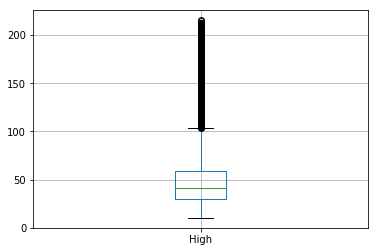

In [30]:
d3.boxplot("High")

In [33]:
high = np.array(d3['High'])
low = np.array(d3['Low'])

In [34]:
high

array([180.87, 177.53, 178.06, ...,  10.25,  10.25,  10.25])

(array([2470., 3827., 1567.,  447.,  153.,  318.,  230.,  132.,  172.,
         101.]),
 array([ 10.25 ,  30.768,  51.286,  71.804,  92.322, 112.84 , 133.358,
        153.876, 174.394, 194.912, 215.43 ]),
 <a list of 10 Patch objects>)

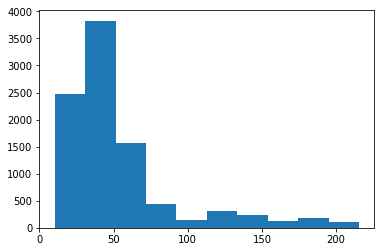

In [36]:
plt.hist(high)

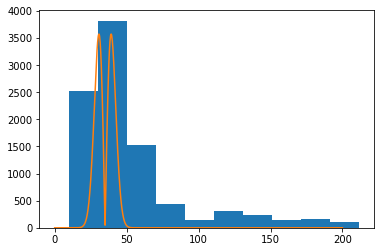

In [42]:
plt.hist(low)
x = np.linspace(0,200,1000)
y = ss.dweibull.pdf(x,2,35,6)*50000
plt.plot(x,y)